In [ ]:
#зміни для завдання в інший файл

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
housing.info()
# ❑ Combien des colonnes contient votre tableau ? - 10
# ❑ Combien des lignes contient votre tableau ? - 20640
# ❑ Est-ce qu’il y a des colonnes aves des données manquantes ? non
# ❑ Les variables du tableau, sont-ils du même type ? non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


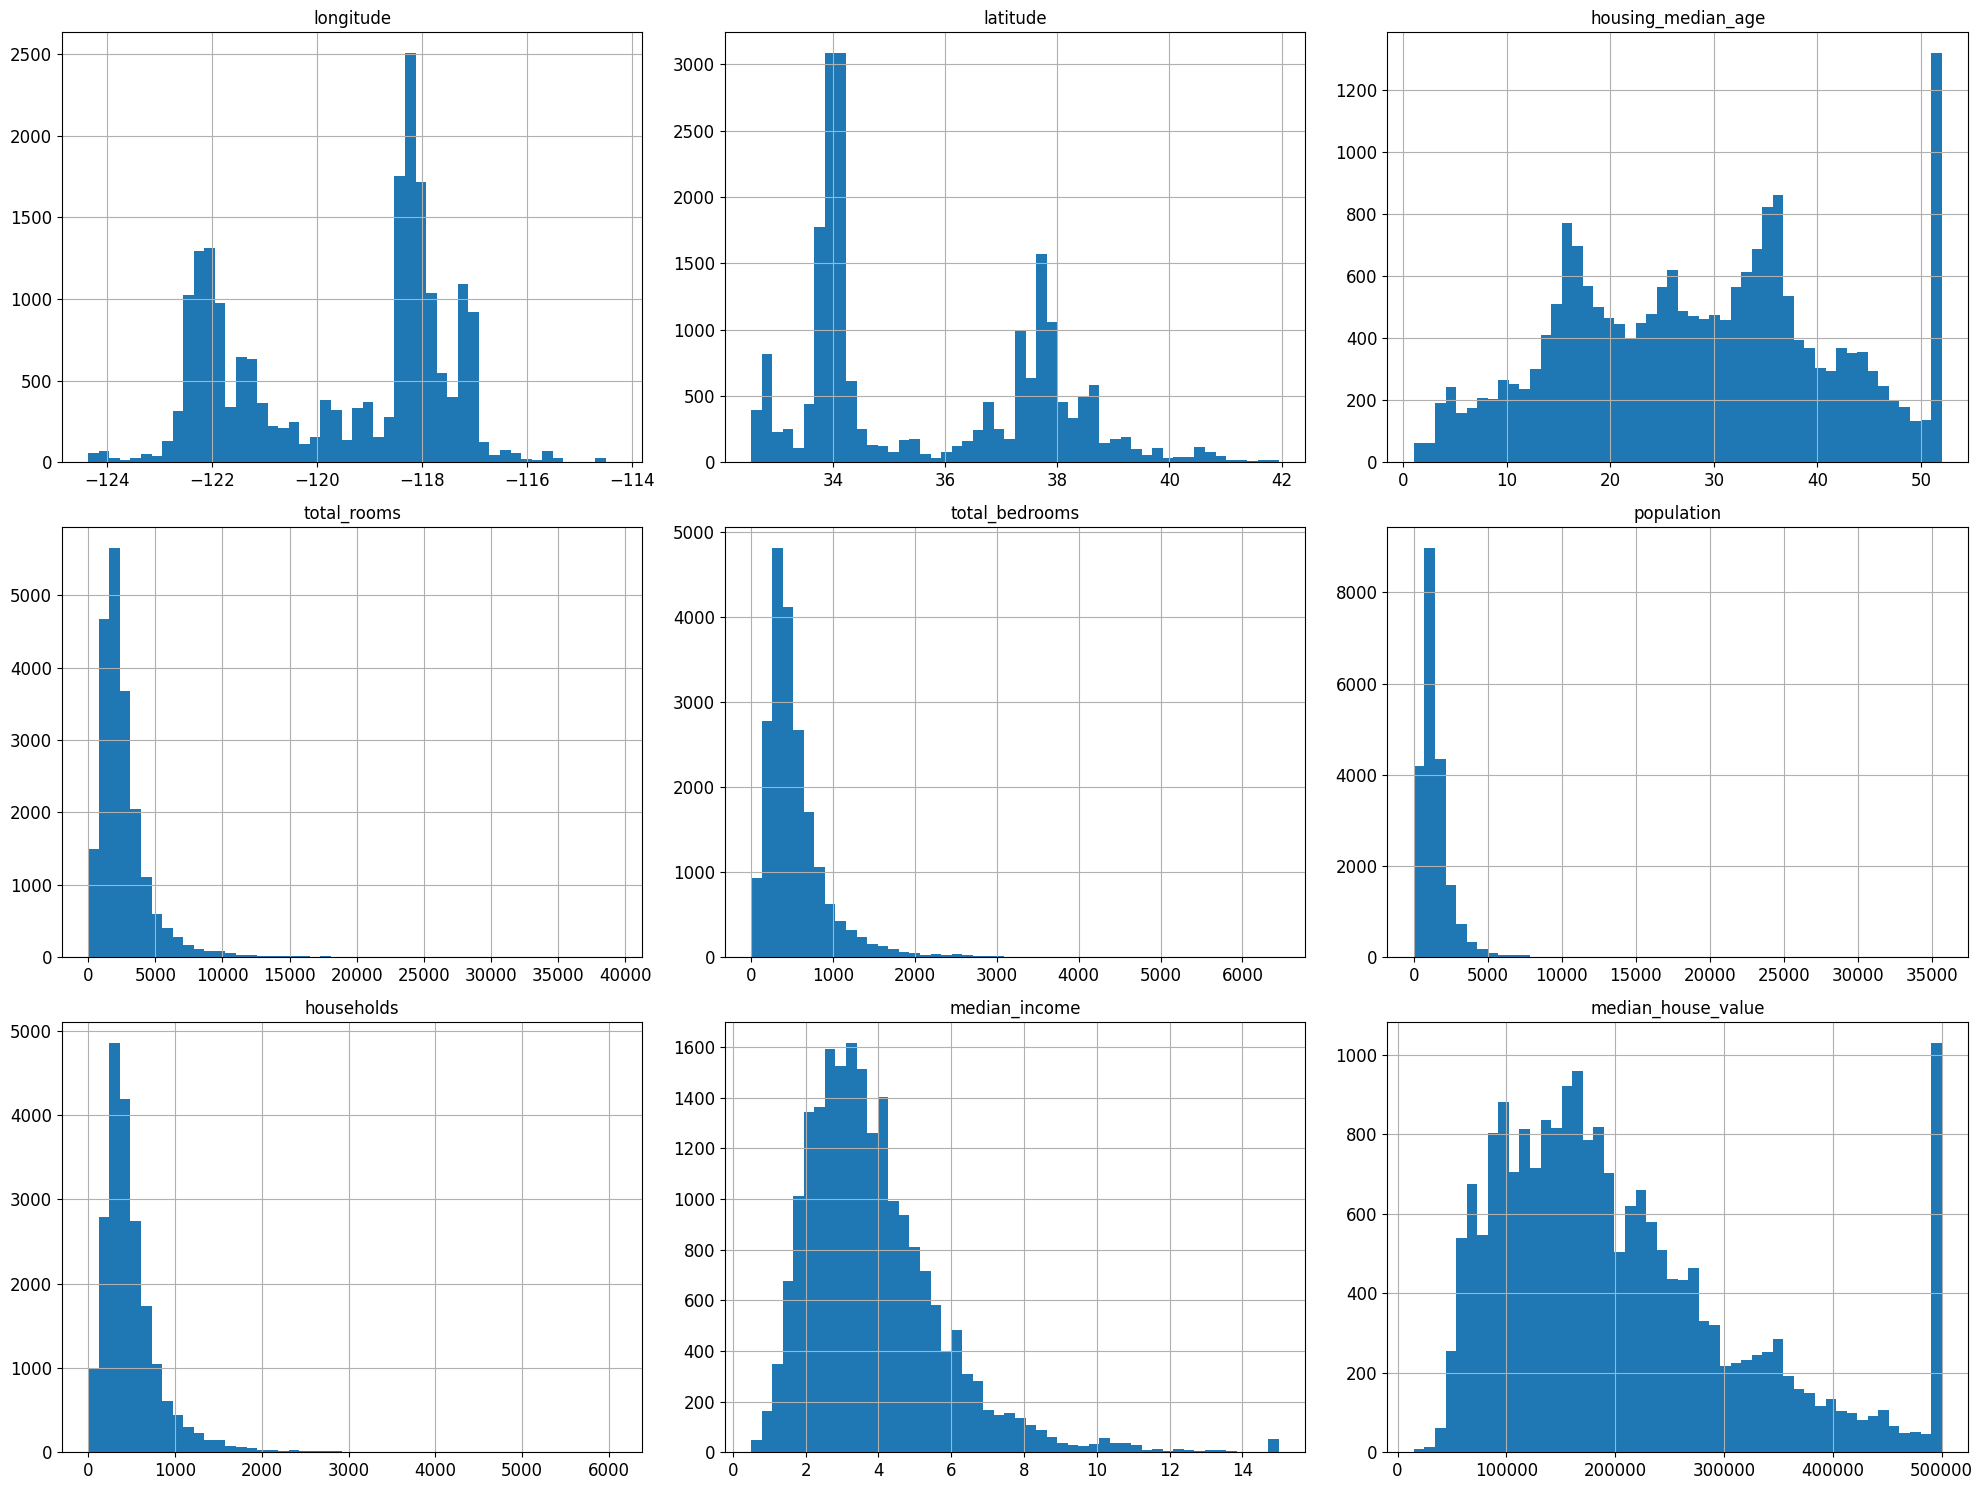

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#Quelle variable correspond à l’histogramme ci-dessous ?
# median_income

In [10]:
np.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
print("Taille du jeu d'entraînement :", len(train_set))
print("Taille du jeu de test :", len(test_set))

Taille du jeu d'entraînement : 16512
Taille du jeu de test : 4128


In [13]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

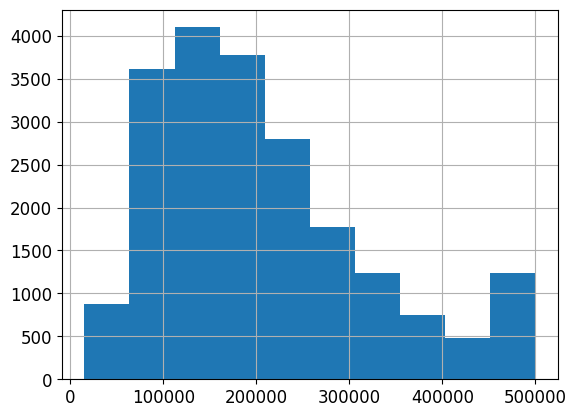

In [14]:
housing["median_house_value"].hist()

<Axes: >

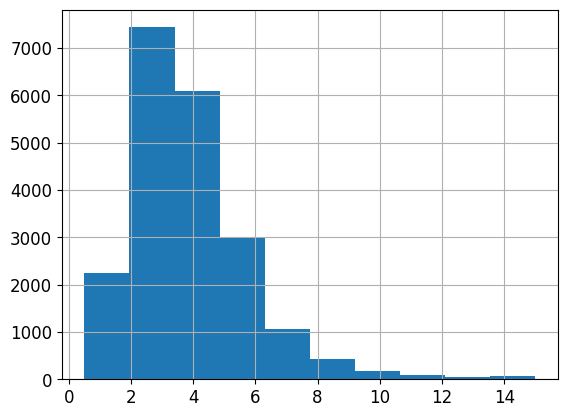

In [15]:
housing["median_income"].hist()

In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [17]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

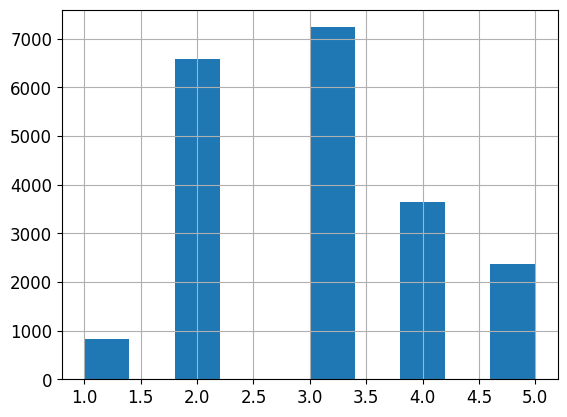

In [18]:
housing["income_cat"].hist()

In [19]:
housing["housing_income"] = pd.cut(housing["median_income"],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=["Très Faible", "Faible", "Moyen", "Élevé", "Très Élevé"])

In [20]:
housing["housing_income"].value_counts()

Moyen          7236
Faible         6581
Élevé          3639
Très Élevé     2362
Très Faible     822
Name: housing_income, dtype: int64

<Axes: >

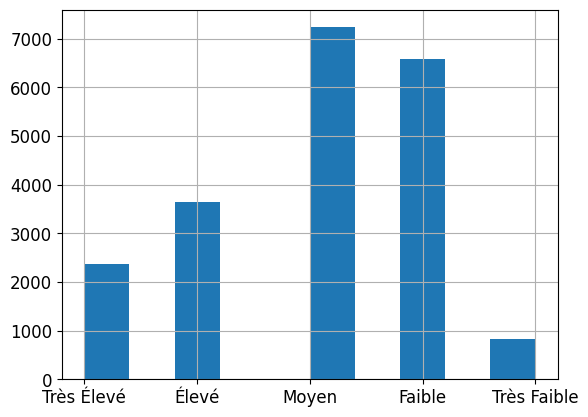

In [21]:
housing["housing_income"].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["housing_income"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["housing_income"].value_counts() / len(strat_test_set)

Moyen          0.350533
Faible         0.318798
Élevé          0.176357
Très Élevé     0.114341
Très Faible    0.039971
Name: housing_income, dtype: float64

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [26]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [27]:
housing["housing_income"].value_counts() / len(housing)

Moyen          0.350581
Faible         0.318847
Élevé          0.176308
Très Élevé     0.114438
Très Faible    0.039826
Name: housing_income, dtype: float64

In [28]:
def income_cat_proportions(data):
    return data["housing_income"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Très Faible,0.039826,0.039971,0.040213,0.973236,0.364964
Faible,0.318847,0.318798,0.324370,1.732260,-0.015195
Moyen,0.350581,0.350533,0.358527,2.266446,-0.013820
Élevé,0.176308,0.176357,0.167393,-5.056334,0.027480
Très Élevé,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("housing_income", axis=1, inplace=True)

In [31]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


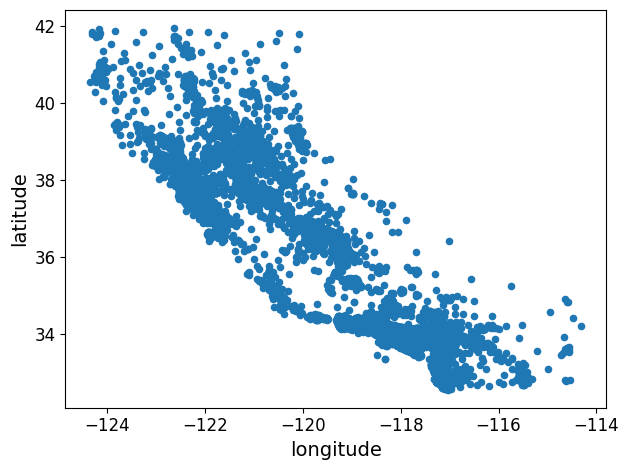

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


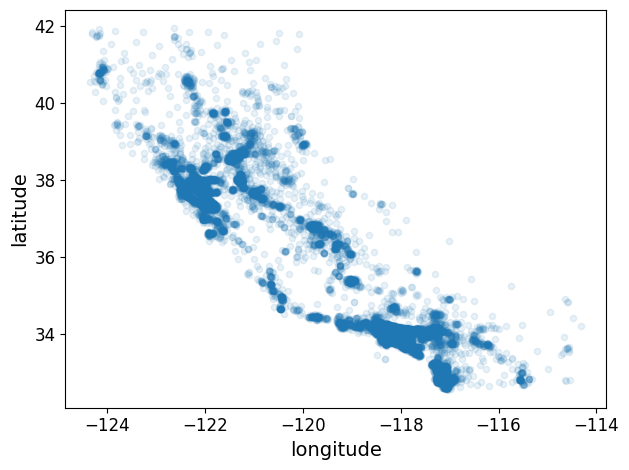

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


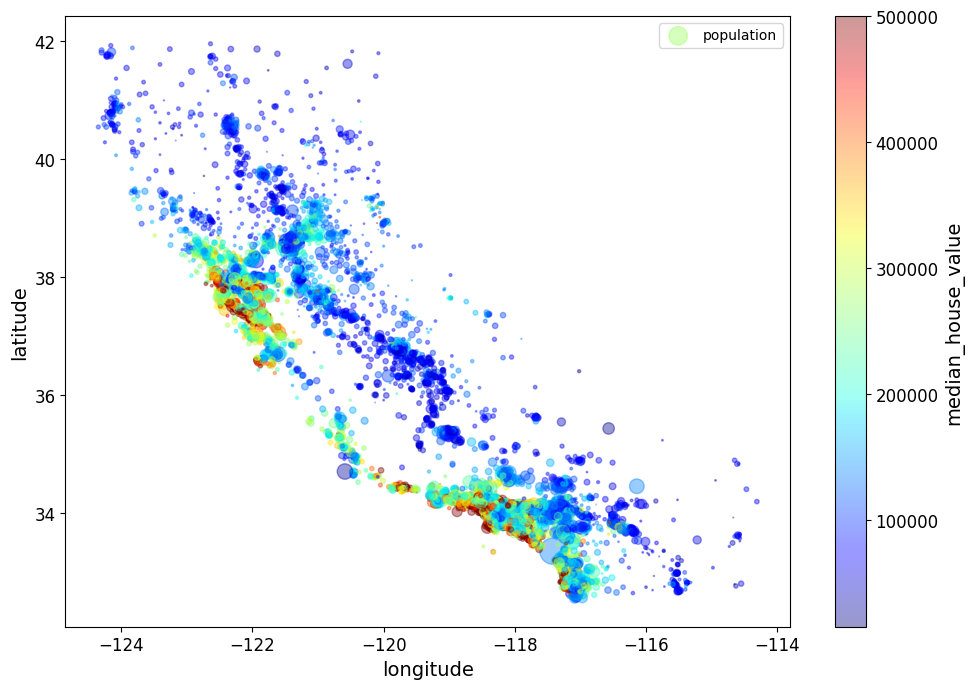

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [35]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7bb85067b580>)

Saving figure california_housing_prices_plot


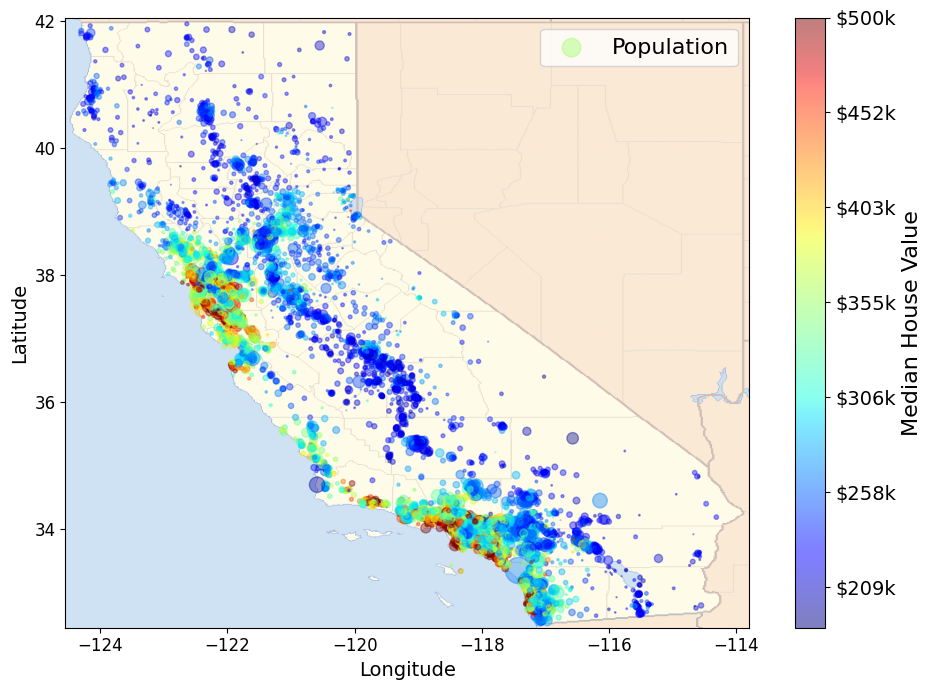

In [36]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [37]:
corr_matrix = housing.corr()

<ipython-input-37-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)
#Quelle est la variable avec la plus faible corrélation avec la colonne « median_house_value »?
# population


median_house_value    1.000000
median_income         0.687159
total_rooms           0.136218
housing_median_age    0.109334
households            0.069536
total_bedrooms        0.051839
population           -0.022890
longitude            -0.047366
latitude             -0.141543
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


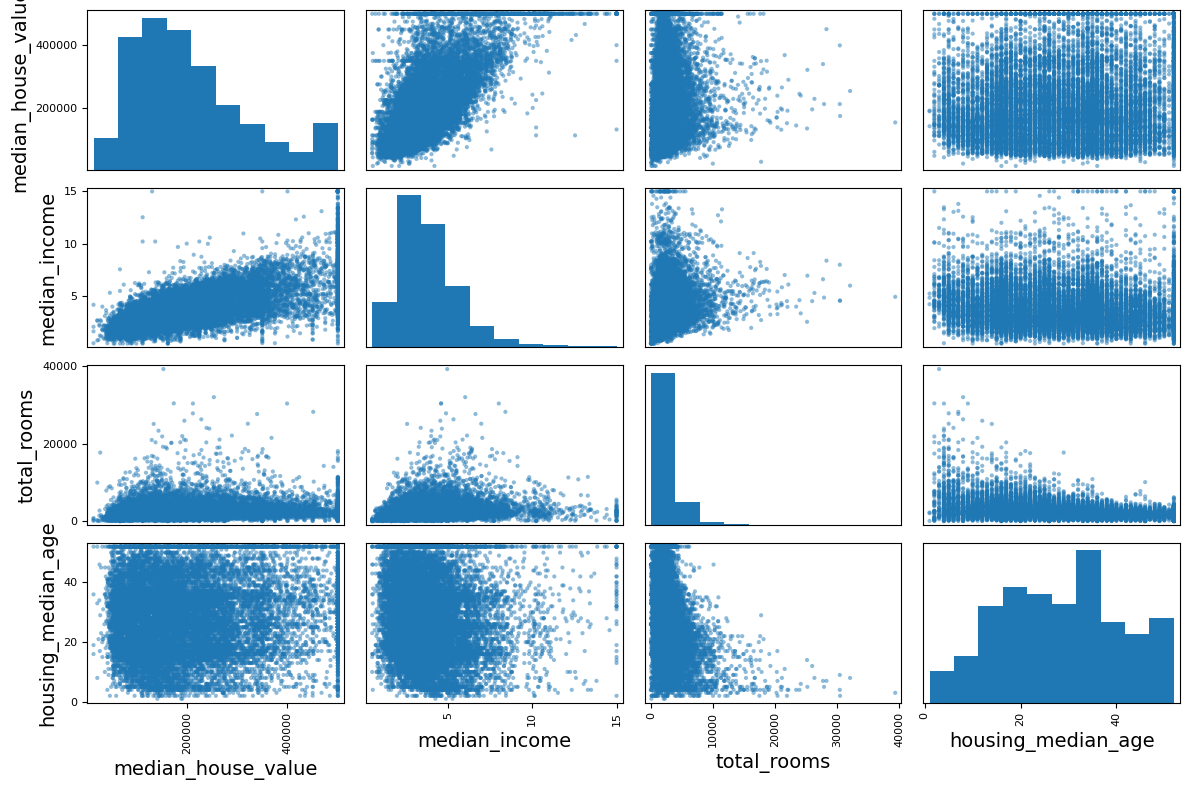

In [39]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


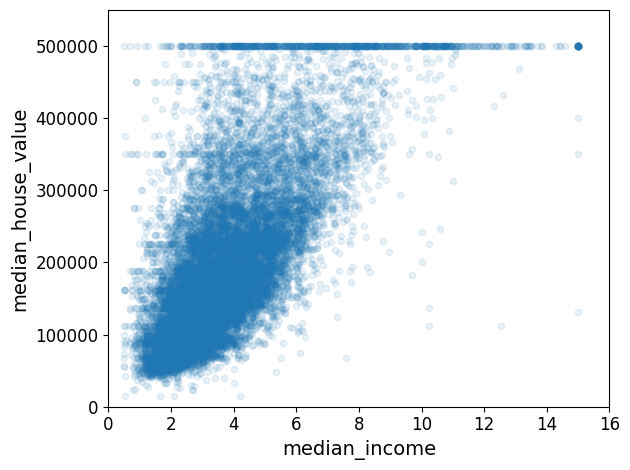

In [40]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [41]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [42]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

#Est-ce que l’une de variable créé nous aide à mieux expliquer la valeur médiane des appartement ?
# oui

<ipython-input-42-30107eb6532a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687159
rooms_per_household         0.143873
total_rooms                 0.136218
housing_median_age          0.109334
households                  0.069536
total_bedrooms              0.051839
population                 -0.022890
population_per_household   -0.027166
longitude                  -0.047366
latitude                   -0.141543
bedrooms_per_room          -0.257229
Name: median_house_value, dtype: float64

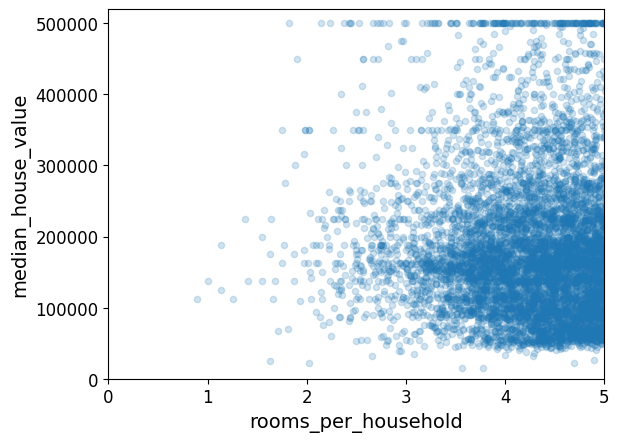

In [43]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000
mean,-119.560323,35.623722,28.587512,2640.752422,538.772074,1424.957909,500.087573,3.869205,207119.826793,5.440212,0.213043,3.072876
std,1.998524,2.131570,12.608316,2183.069090,421.753384,1124.968611,382.105167,1.892156,115515.234155,2.602919,0.057780,10.934137
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.790000,33.940000,18.000000,1447.750000,296.000000,788.000000,279.000000,2.569850,119800.000000,4.443181,0.175633,2.428368
50%,-118.490000,34.250000,29.000000,2127.000000,435.000000,1170.000000,410.000000,3.529600,180100.000000,5.227056,0.203401,2.814978
75%,-118.010000,37.710000,37.000000,3158.000000,648.000000,1724.000000,606.000000,4.743250,264600.000000,6.046629,0.239619,3.280218
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [45]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [46]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
19818,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,INLAND,3
12809,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,2
11449,-117.98,33.68,24.0,4177.0,NaN,1704.0,606.0,6.2473,<1H OCEAN,5
14986,-117.03,32.73,34.0,2061.0,NaN,1169.0,400.0,3.5096,NEAR OCEAN,3
19122,-122.65,38.25,23.0,4030.0,NaN,1852.0,778.0,3.4020,<1H OCEAN,3


In [47]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [48]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
19818,-119.30,36.57,32.0,728.0,461.0,149.0,3.0156,INLAND,3
12809,-121.47,38.61,31.0,1072.0,781.0,281.0,1.6563,INLAND,2
11449,-117.98,33.68,24.0,4177.0,1704.0,606.0,6.2473,<1H OCEAN,5
14986,-117.03,32.73,34.0,2061.0,1169.0,400.0,3.5096,NEAR OCEAN,3
19122,-122.65,38.25,23.0,4030.0,1852.0,778.0,3.4020,<1H OCEAN,3


In [49]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [50]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
19818,-119.30,36.57,32.0,728.0,435.0,461.0,149.0,3.0156,INLAND,3
12809,-121.47,38.61,31.0,1072.0,435.0,781.0,281.0,1.6563,INLAND,2
11449,-117.98,33.68,24.0,4177.0,435.0,1704.0,606.0,6.2473,<1H OCEAN,5
14986,-117.03,32.73,34.0,2061.0,435.0,1169.0,400.0,3.5096,NEAR OCEAN,3
19122,-122.65,38.25,23.0,4030.0,435.0,1852.0,778.0,3.4020,<1H OCEAN,3


In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [52]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [53]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  435.    , 1170.    ,
        410.    ,    3.5296,    3.    ])

In [55]:
housing_num.median().values

<ipython-input-55-8050cbb6f664>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_num.median().values


array([-118.49  ,   34.25  ,   29.    , 2127.    ,  435.    , 1170.    ,
        410.    ,    3.5296])

In [56]:
X = imputer.transform(housing_num)

In [57]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [58]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
19818,-119.30,36.57,32.0,728.0,435.0,461.0,149.0,3.0156,3.0
12809,-121.47,38.61,31.0,1072.0,435.0,781.0,281.0,1.6563,2.0
11449,-117.98,33.68,24.0,4177.0,435.0,1704.0,606.0,6.2473,5.0
14986,-117.03,32.73,34.0,2061.0,435.0,1169.0,400.0,3.5096,3.0
19122,-122.65,38.25,23.0,4030.0,435.0,1852.0,778.0,3.4020,3.0


In [59]:
imputer.strategy

'median'

In [60]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [61]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
908,-122.00,37.54,29.0,4133.0,744.0,2023.0,749.0,5.1616,4.0
2093,-119.78,36.76,50.0,1343.0,322.0,1063.0,342.0,1.7500,2.0
12662,-121.42,38.50,24.0,7740.0,1539.0,4333.0,1397.0,3.0250,3.0
5459,-118.47,33.99,34.0,1875.0,501.0,1491.0,526.0,2.8417,2.0
17894,-121.95,37.37,39.0,446.0,129.0,317.0,127.0,3.0357,3.0


In [62]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
908,<1H OCEAN
2093,INLAND
12662,INLAND
5459,<1H OCEAN
17894,<1H OCEAN
14195,NEAR OCEAN
11145,<1H OCEAN
17605,<1H OCEAN
13636,INLAND
3522,<1H OCEAN


In [63]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [66]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [67]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [68]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [70]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [71]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
908,-122.0,37.54,29.0,4133.0,744.0,2023.0,749.0,5.1616,<1H OCEAN,4,5.518024,2.700935
2093,-119.78,36.76,50.0,1343.0,322.0,1063.0,342.0,1.75,INLAND,2,3.926901,3.108187
12662,-121.42,38.5,24.0,7740.0,1539.0,4333.0,1397.0,3.025,INLAND,3,5.540444,3.101646
5459,-118.47,33.99,34.0,1875.0,501.0,1491.0,526.0,2.8417,<1H OCEAN,2,3.564639,2.834601
17894,-121.95,37.37,39.0,446.0,129.0,317.0,127.0,3.0357,<1H OCEAN,3,3.511811,2.496063


In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [74]:
housing_num_tr

array([[-1.22077619,  0.89902573,  0.03271653, ...,  0.02989507,
        -0.03401758, -0.5234211 ],
       [-0.10992275,  0.53308723,  1.69833438, ..., -0.58140768,
         0.00322952,  0.40674047],
       [-0.93055322,  1.34941157, -0.36385915, ...,  0.03850865,
         0.00263131, -0.23038408],
       ...,
       [-1.27081463,  0.83334446, -0.76043482, ..., -0.72337703,
         0.02152229,  0.80647268],
       [ 0.13526562, -0.61633499, -0.28454401, ..., -0.13874926,
         0.01758218, -0.61717088],
       [ 1.24111522, -1.32475439, -0.28454401, ..., -0.04267463,
        -0.08989991, -0.42560318]])

In [75]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [76]:
housing_prepared

array([[-1.22077619,  0.89902573,  0.03271653, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10992275,  0.53308723,  1.69833438, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93055322,  1.34941157, -0.36385915, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.27081463,  0.83334446, -0.76043482, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.13526562, -0.61633499, -0.28454401, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.24111522, -1.32475439, -0.28454401, ...,  0.        ,
         0.        ,  1.        ]])

In [77]:
housing_prepared.shape

(16512, 17)

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [79]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [80]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [81]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.22077619,  0.89902573,  0.03271653, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10992275,  0.53308723,  1.69833438, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93055322,  1.34941157, -0.36385915, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.27081463,  0.83334446, -0.76043482, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.13526562, -0.61633499, -0.28454401, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.24111522, -1.32475439, -0.28454401, ...,  0.        ,
         0.        ,  1.        ]])

In [83]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [85]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [293618.19801404  93643.17562172 125284.11872362 194248.21000792
 224830.40166625]


In [86]:
print("Labels:", list(some_labels))

Labels: [275100.0, 49800.0, 87900.0, 321400.0, 208300.0]


In [87]:
some_data_prepared

array([[-1.22077619,  0.89902573,  0.03271653,  0.6835756 ,  0.49151003,
         0.5316239 ,  0.6514436 ,  0.68304861,  0.94182312,  0.02989507,
        -0.03401758, -0.5234211 ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.10992275,  0.53308723,  1.69833438, -0.59448037, -0.51395413,
        -0.32175908, -0.41374044, -1.12002849, -0.95468705, -0.58140768,
         0.00322952,  0.40674047,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.93055322,  1.34941157, -0.36385915,  2.33588667,  2.38569015,
         2.58507671,  2.34736315, -0.44617361, -0.00643196,  0.03850865,
         0.00263131, -0.23038408,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.54558086, -0.7664636 ,  0.42929221, -0.35077938, -0.08746578,
         0.0587075 ,  0.06781696, -0.54305016, -0.95468705, -0.7205871 ,
        -0.02179254,  0.8339073 ,  1.        ,  0.        ,  0.        ,
         0.        

In [88]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68413.22784698676

In [89]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49558.879515012

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [91]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [93]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70260.83220177 68241.52548322 67166.24989575 71490.36452501
 71899.34095138 69201.11286039 73233.45024929 69234.36109289
 69924.34769389 72526.32795787]
Mean: 70317.79129114765
Standard deviation: 1845.9917516451774


In [94]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68623.95989205 70737.63655179 70436.55412169 73142.05508014
 66763.05503672 69585.57278492 67866.69173718 65496.60537661
 66754.43670856 68705.84710144]
Mean: 68811.24143911025
Standard deviation: 2146.132736383923


In [95]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [96]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18591.8970115667

In [97]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50695.06956184 50759.15301952 50663.95120767 50927.39432507
 49455.53048326 48203.69612708 51957.87933723 48030.73881211
 48344.09091649 51217.83002994]
Mean: 50025.53338202043
Standard deviation: 1334.6680323451149


In [98]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68811.241439
std       2262.222536
min      65496.605377
25%      67038.964212
50%      68664.903497
75%      70223.808787
max      73142.055080
dtype: float64

In [100]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

106627.33613378492

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [102]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [104]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64522.13294042566 {'max_features': 2, 'n_estimators': 3}
56162.438134949996 {'max_features': 2, 'n_estimators': 10}
52882.133870892176 {'max_features': 2, 'n_estimators': 30}
60790.262213564965 {'max_features': 4, 'n_estimators': 3}
53524.34968455519 {'max_features': 4, 'n_estimators': 10}
51016.831424111006 {'max_features': 4, 'n_estimators': 30}
59835.72332708885 {'max_features': 6, 'n_estimators': 3}
53150.96921828746 {'max_features': 6, 'n_estimators': 10}
50964.13246762841 {'max_features': 6, 'n_estimators': 30}
59140.05892199676 {'max_features': 8, 'n_estimators': 3}
53192.66254148434 {'max_features': 8, 'n_estimators': 10}
50638.4308030803 {'max_features': 8, 'n_estimators': 30}
63510.11095503068 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54877.23089898556 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60217.54987116716 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52831.28828498239 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [105]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086341,0.003085,0.006301,0.000835,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.352221e+09,-4.064069e+09,...,-4.163106e+09,1.807007e+08,18,-1.088861e+09,-1.108124e+09,-1.189127e+09,-1.162956e+09,-1.094116e+09,-1.128637e+09,4.007834e+07
1,0.264147,0.007516,0.012547,0.001114,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.224606e+09,-3.205035e+09,...,-3.154219e+09,6.960482e+07,11,-5.793460e+08,-5.893493e+08,-5.937021e+08,-5.880631e+08,-5.857577e+08,-5.872436e+08,4.720107e+06
2,0.923346,0.170015,0.042658,0.010082,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.905707e+09,-2.885949e+09,...,-2.796520e+09,8.662834e+07,6,-4.268533e+08,-4.231029e+08,-4.337234e+08,-4.252512e+08,-4.353962e+08,-4.288654e+08,4.828460e+06
3,0.127846,0.002916,0.004955,0.000543,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.641983e+09,-3.917816e+09,...,-3.695456e+09,1.180387e+08,16,-9.746829e+08,-1.015218e+09,-1.012408e+09,-1.041314e+09,-9.863961e+08,-1.006004e+09,2.340180e+07
4,0.548613,0.260859,0.017120,0.006382,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.885566e+09,-3.006080e+09,...,-2.864856e+09,7.705650e+07,9,-5.308058e+08,-5.387810e+08,-5.486712e+08,-5.568062e+08,-5.332362e+08,-5.416601e+08,9.753221e+06
5,1.339699,0.182164,0.036013,0.002466,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.689150e+09,-2.664806e+09,...,-2.602717e+09,6.335958e+07,3,-3.945102e+08,-3.967571e+08,-4.025954e+08,-4.083964e+08,-3.965595e+08,-3.997637e+08,5.088185e+06
6,0.230796,0.039340,0.006274,0.001660,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.713361e+09,-3.521437e+09,...,-3.580314e+09,1.128946e+08,13,-9.559033e+08,-9.189798e+08,-9.796413e+08,-9.739488e+08,-9.482742e+08,-9.553495e+08,2.149022e+07
7,0.587126,0.012722,0.013542,0.001293,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.839152e+09,-2.841504e+09,...,-2.825026e+09,4.311228e+07,7,-5.129369e+08,-5.215271e+08,-5.343082e+08,-5.291966e+08,-5.243572e+08,-5.244652e+08,7.222419e+06
8,2.003539,0.351777,0.038032,0.002042,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.606104e+09,-2.631948e+09,...,-2.597343e+09,2.710466e+07,2,-3.851086e+08,-3.880946e+08,-4.032352e+08,-3.965178e+08,-3.953995e+08,-3.936711e+08,6.433929e+06
9,0.232826,0.004209,0.005064,0.000341,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.576357e+09,-3.478939e+09,...,-3.497547e+09,4.370697e+07,12,-9.550310e+08,-9.446275e+08,-9.105232e+08,-9.606936e+08,-8.817220e+08,-9.305194e+08,2.997124e+07


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb8506f0430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb850738c70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [107]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49669.61162220256 {'max_features': 7, 'n_estimators': 180}
52035.51330553941 {'max_features': 5, 'n_estimators': 15}
50993.42088865222 {'max_features': 3, 'n_estimators': 72}
51139.94177184341 {'max_features': 5, 'n_estimators': 21}
49761.44936479332 {'max_features': 7, 'n_estimators': 122}
50973.44831774258 {'max_features': 3, 'n_estimators': 75}
50775.16593013702 {'max_features': 3, 'n_estimators': 88}
50202.076625583366 {'max_features': 5, 'n_estimators': 100}
50638.585561720836 {'max_features': 3, 'n_estimators': 150}
65544.97050229827 {'max_features': 5, 'n_estimators': 2}


In [108]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.65832267e-02, 6.17422058e-02, 4.52143389e-02, 1.62657575e-02,
       1.49424909e-02, 1.60946150e-02, 1.48630433e-02, 3.02367052e-01,
       1.31582044e-01, 3.27417356e-02, 1.09233268e-01, 5.53392718e-02,
       5.67422570e-03, 1.21510770e-01, 1.07289143e-04, 2.04544716e-03,
       3.69321923e-03])

In [109]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.302367051953908, 'median_income'),
 (0.13158204358442235, 'income_cat'),
 (0.12151076991450588, 'INLAND'),
 (0.10923326780589153, 'pop_per_hhold'),
 (0.06658322666644877, 'longitude'),
 (0.06174220580353355, 'latitude'),
 (0.05533927175894092, 'bedrooms_per_room'),
 (0.04521433892738935, 'housing_median_age'),
 (0.032741735584665796, 'rooms_per_hhold'),
 (0.0162657575091991, 'total_rooms'),
 (0.016094615043839237, 'population'),
 (0.014942490902379929, 'total_bedrooms'),
 (0.014863043314938361, 'households'),
 (0.0056742256998937625, '<1H OCEAN'),
 (0.003693219231491602, 'NEAR OCEAN'),
 (0.002045447155427159, 'NEAR BAY'),
 (0.0001072891431247637, 'ISLAND')]

In [110]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [111]:
final_rmse

49632.80751083369

In [112]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([47318.26387185, 51844.12278136])

In [113]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(47318.263871847776, 51844.1227813638)

In [114]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(47318.95927331969, 51843.488078107286)